In [1]:
pip install praw

In [2]:
#!/usr/bin/env python
 
"""This example demonstrates the flow for retrieving a refresh token.
 
In order for this example to work your application's redirect URI must be set to
http://localhost:8080.
 
This tool can be used to conveniently create refresh tokens for later use with your web
application OAuth2 credentials.
 
"""
import random
import socket
import sys
 
import praw
 
 
def receive_connection():
    """Wait for and then return a connected socket..
 
    Opens a TCP connection on port 8080, and waits for a single client.
 
    """
    server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    server.bind(("localhost", 8080))
    server.listen(1)
    client = server.accept()[0]
    server.close()
    return client
 
 
def send_message(client, message):
    """Send message to client and close the connection."""
    print(message)
    client.send(f"HTTP/1.1 200 OK\r\n\r\n{message}".encode("utf-8"))
    client.close()
 
 
def main():
    """Provide the program's entry point when directly executed."""
    print(
        "Go here while logged into the account you want to create a token for: "
        "https://www.reddit.com/prefs/apps/"
    )
    print(
        "Click the create an app button. Put something in the name field and select the"
        " script radio button."
    )
    print("Put http://localhost:8080 in the redirect uri field and click create app")
    client_id = input(
        "Enter the client ID, it's the line just under Personal use script at the top: "
    )
    client_secret = input("Enter the client secret, it's the line next to secret: ")
    commaScopes = input(
        "Now enter a comma separated list of scopes, or all for all tokens: "
    )
 
    if commaScopes.lower() == "all":
        scopes = ["*"]
    else:
        scopes = commaScopes.strip().split(",")
 
    reddit = praw.Reddit(
        client_id=client_id.strip(),
        client_secret=client_secret.strip(),
        redirect_uri="http://localhost:8080",
        user_agent="praw_refresh_token_example",
    )
    state = str(random.randint(0, 65000))
    url = reddit.auth.url(scopes, state, "permanent")
    print(f"Now open this url in your browser: {url}")
    sys.stdout.flush()
 
    client = receive_connection()
    data = client.recv(1024).decode("utf-8")
    param_tokens = data.split(" ", 2)[1].split("?", 1)[1].split("&")
    params = {
        key: value for (key, value) in [token.split("=") for token in param_tokens]
    }
 
    if state != params["state"]:
        send_message(
            client,
            f"State mismatch. Expected: {state} Received: {params['state']}",
        )
        return 1
    elif "error" in params:
        send_message(client, params["error"])
        return 1
 
    refresh_token = reddit.auth.authorize(params["code"])
    send_message(client, f"Refresh token: {refresh_token}")
    return 0
 
 
if __name__ == "__main__":
    sys.exit(main())

Go here while logged into the account you want to create a token for: https://www.reddit.com/prefs/apps/
Click the create an app button. Put something in the name field and select the script radio button.
Put http://localhost:8080 in the redirect uri field and click create app
Now open this url in your browser: https://www.reddit.com/api/v1/authorize?client_id=L3Blrciu_fpkVNSbByFN9g&duration=permanent&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&scope=&state=35237


C:\Users\jnaid\AppData\Local\Temp\ipykernel_23644\4285503165.py:72: DeprecationWarning: Positional arguments for 'Auth.url' will no longer be supported in PRAW 8.
Call this function with 'scopes', 'state', and 'duration' as keyword arguments.
  url = reddit.auth.url(scopes, state, "permanent")


PermissionError: [WinError 10013] An attempt was made to access a socket in a way forbidden by its access permissions

In [22]:
#use llamaparse for pdf's

In [14]:
import requests
 
subreddit = 'outdoors'
limit = 100
timeframe = 'month' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top

#json output for top 100 posts of a subreddit
def get_subreddit_json(subreddit,listing,limit,timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('error')
    return request.json()

x = get_subreddit_json(subreddit,listing,limit,timeframe)

In [15]:
x

{'kind': 'Listing',
 'data': {'after': 't3_1j60h73',
  'dist': 100,
  'modhash': '',
  'geo_filter': '',
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'Outdoors',
     'selftext': '',
     'author_fullname': 't2_ekzykd23',
     'saved': False,
     'mod_reason_title': None,
     'gilded': 0,
     'clicked': False,
     'title': 'This Landscape is Beautiful',
     'link_flair_richtext': [],
     'subreddit_name_prefixed': 'r/Outdoors',
     'hidden': False,
     'pwls': 6,
     'link_flair_css_class': '',
     'downs': 0,
     'thumbnail_height': 140,
     'top_awarded_type': None,
     'hide_score': False,
     'name': 't3_1jinzyr',
     'quarantine': False,
     'link_flair_text_color': 'light',
     'upvote_ratio': 0.99,
     'author_flair_background_color': None,
     'ups': 9298,
     'total_awards_received': 0,
     'media_embed': {},
     'thumbnail_width': 140,
     'author_flair_template_id': None,
     'is_original_content': False,
     

In [5]:
def get_post_titles(top_100_posts_json):
    '''
    gathers top 100 post itles in a list
    '''
    title_list = []
    for post in top_100_posts_json['data']['children']:
        title = post['data']['title']
        title_list.append(title)
    return title_list
 
y1 = get_post_titles(x)
y1



['This Landscape is Beautiful',
 'That bench with this view',
 'The most beautiful place I have ever been to',
 'Boardwalk appreciation',
 'Yukon Pass, Alaska',
 'Beautiful morning in Switzerland',
 'Dolomites',
 'Snoqualmie Falls... A truly magical place in Washington state',
 'The New Forest, England',
 'Springtime hikes in Southern Utah',
 'Multnomah Falls',
 'Some pictures of things I saw on trees on my walk today',
 'I Just Biked Across the Bolivian Altiplano',
 'this spot is unreal🤍',
 'I drove an hour and a half on a work hour for this photo!',
 'Love a cool foggy morning',
 'Rate my chilling spot',
 'Feels like another world sometimes',
 'Matterhorn. Switzerland',
 'My watercolor painting of a mountain in Utah',
 'Some of my favorite sunsets from the last couple months (all taken at the same lake)',
 'Stunning morning in the Swiss Alps',
 'Finally saw an Aurora',
 'Spring fever in the mountains, Pennsylvania. USA.',
 'Pics from yesterday’s sunset walk',
 'Above 11,000 ft in Nev

In [18]:
def get_author(top_100_posts_json):    
    author_list = []
    for post in top_100_posts_json['data']['children']:
        author = post['data']['author']
        author_list.append(author)
    return author_list

y2 = get_author(x)
y2

['Simple_Shame2386',
 'Simple_Shame2386',
 'Grouchy_Wear_9729',
 'Alaric_Darconville',
 'AwesomeATrain27',
 'Simple_Shame2386',
 'Simple_Shame2386',
 'Natureperfect0',
 'No-Whole2768',
 'Therealfern1',
 'alleyrope',
 'Alaric_Darconville',
 'donivanberube',
 'Simple_Shame2386',
 'ThatAstroGuyNZ',
 'Alaric_Darconville',
 'allouttabvbblegum',
 'ElementalBlazes',
 'crabbymccrabby',
 'onewordpoet',
 'Alaric_Darconville',
 'Simple_Shame2386',
 'XTheEternalBeastX',
 'overloadimages',
 'Alaric_Darconville',
 'TheLostLongboarder',
 'BellRockPhotography',
 'MikeDavJ',
 'Zorqo',
 'LostPoet-AtTheBar',
 'No-Whole2768',
 'indieaz',
 'EventualOutcome',
 'thatturtledood',
 'thedadoutdoors',
 'Alaric_Darconville',
 'Strix-Livens',
 'itsarace1',
 'tjlightbulb',
 'PortraitOfAHiker',
 'standardsafaris',
 'patrick_jasper',
 'No-Whole2768',
 'valueinvestor13',
 'alleyrope',
 'coffeewalnut05',
 'HistorianHoliday3250',
 'foxcloveflower',
 'puri_upma_',
 'Natureperfect0',
 'MossBrownCo',
 'ThatAstroGuyNZ',
 'm

In [19]:

#example post title:
#https://www.reddit.com/r/Outdoors/comments/1iurggs/ice_is_such_a_beautiful_part_of_winter/

subreddit = 'outdoors'
title = y1[1]
author = y2[1]

def get_post_json():#list_of_titles, list_of_authors):
    '''
    iterates through list of titles and authors to find top comments from eah post
    '''
    top_comment_list = []
    #for title in list_of_titles:
    #    for author in list_of_authors:
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/comments/{author}/{title}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'yourbot'})
    except:
        print('error')
    return request.json()

get_post_json()


{'message': 'Not Found', 'error': 404}

In [28]:
import requests
import time

# Function to get comments from a Reddit post
def get_post_comments(post_url):
    """
    Given a Reddit post URL, fetch the top-level comments.
    """
    headers = {'User-agent': 'yourbot'}
    try:
        # Append `.json` to the post URL to fetch comments
        response = requests.get(post_url + ".json", headers=headers)
        response.raise_for_status()  # Ensure response is valid
        data = response.json()
        
        comments = []
        for comment in data[1]['data']['children']:
            if 'body' in comment['data']:  # Ensure it's a comment (not an announcement, etc.)
                comments.append(comment['data']['body'])
        
        return comments
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching comments: {e}")
        return []

# Function to extract post URLs and get comments
def get_all_comments(top_100_posts_json, post_limit=10):
    """
    Extracts URLs from subreddit posts and fetches comments for each.
    """
    posts_with_comments = []
    
    for i, post in enumerate(top_100_posts_json['data']['children']):
        if i >= post_limit:
            break
        
        post_url = "https://www.reddit.com" + post['data']['permalink']
        title = post['data']['title']
        
        print(f"Fetching comments for: {title}")
        comments = get_post_comments(post_url)
        
        posts_with_comments.append({
            "title": title,
            "url": post_url,
            "comments": comments
        })
        
        time.sleep(1)  # Delay to avoid rate-limiting
    
    return posts_with_comments

# Example Usage
y3 = get_all_comments(x)
print(y3[:3])  # Print first 3 posts with comments


Fetching comments for: This Landscape is Beautiful
Fetching comments for: That bench with this view
Fetching comments for: The most beautiful place I have ever been to
Fetching comments for: Boardwalk appreciation
Fetching comments for: Yukon Pass, Alaska
Fetching comments for: Beautiful morning in Switzerland
Fetching comments for: Dolomites
Fetching comments for: Snoqualmie Falls... A truly magical place in Washington state
Fetching comments for: The New Forest, England
Fetching comments for: Springtime hikes in Southern Utah
[{'title': 'This Landscape is Beautiful', 'url': 'https://www.reddit.com/r/Outdoors/comments/1jinzyr/this_landscape_is_beautiful/', 'comments': ['Stäubi Falls, Switzerland.', 'Every beautiful clip shorter than 10 seconds is suspicious regarding being AI-generated. At least in my head. ;)', "didn't even need the comments to know I was looking at Switzerland. that place is gorgeous x3", 'You couldnt pay me enough to not live there.', 'Looks like portrait to me. lo

In [34]:
import pandas as pd

# Function to save comments to a CSV file
def save_comments_to_csv(posts_with_comments, filename="reddit_comments.csv"):
    """
    Saves extracted Reddit comments into a CSV file.
    """
    data = []

    for post in posts_with_comments:
        title = post["title"]
        url = post["url"]

        for comment in post["comments"]:
            data.append({"Post Title": title, "Post URL": url, "Comment": comment})

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Save to CSV
    df.to_csv(filename, index=False, encoding="utf-8")
    print(f"Saved {len(df)} comments to {filename}")

# Example Usage (Using Your Extracted Comments)
save_comments_to_csv(y2, "reddit_comments.csv")


Saved 1044 comments to reddit_comments.csv


In [35]:
df1 = pd.read_csv('reddit_comments.csv')
df1

,Post Title,Post URL,Comment
0,This Landscape is Beautiful,https://www.reddit.com/r/Outdoors/comments/1ji...,"Stäubi Falls, Switzerland."
1,This Landscape is Beautiful,https://www.reddit.com/r/Outdoors/comments/1ji...,Every beautiful clip shorter than 10 seconds i...
2,This Landscape is Beautiful,https://www.reddit.com/r/Outdoors/comments/1ji...,didn't even need the comments to know I was lo...
3,This Landscape is Beautiful,https://www.reddit.com/r/Outdoors/comments/1ji...,You couldnt pay me enough to not live there.
4,This Landscape is Beautiful,https://www.reddit.com/r/Outdoors/comments/1ji...,Looks like portrait to me. lol
...,...,...,...
1039,Wouldn’t mind spending a season at this fire l...,https://www.reddit.com/r/Outdoors/comments/1jh...,Reminds me of Days Gone. Beautiful view
1040,Wouldn’t mind spending a season at this fire l...,https://www.reddit.com/r/Outdoors/comments/1jh...,How do you apply????
1041,"A little piece of Bariloche in Patagonia, one ...",https://www.reddit.com/r/Outdoors/comments/1j6...,Are those skylights in the grass? Is there a e...
1042,"A little piece of Bariloche in Patagonia, one ...",https://www.reddit.com/r/Outdoors/comments/1j6...,One of my favorite places on earth.


basic 
sentiment analysis

In [22]:
pip install textblob nltk


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Initialize VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity  # Ranges from -1 to 1
    if sentiment_score > 0:
        return "Positive", sentiment_score
    elif sentiment_score < 0:
        return "Negative", sentiment_score
    else:
        return "Neutral", sentiment_score

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    score = sia.polarity_scores(text)["compound"]  # Ranges from -1 to 1
    if score >= 0.05:
        return "Positive", score
    elif score <= -0.05:
        return "Negative", score
    else:
        return "Neutral", score

# Function to analyze sentiment of all comments
def analyze_comments(comments):
    sentiment_results = []
    
    for comment in comments:
        sentiment_textblob, score_textblob = analyze_sentiment_textblob(comment)
        sentiment_vader, score_vader = analyze_sentiment_vader(comment)
        
        sentiment_results.append({
            "comment": comment,
            "sentiment_textblob": sentiment_textblob,
            "score_textblob": score_textblob,
            "sentiment_vader": sentiment_vader,
            "score_vader": score_vader
        })
    
    return sentiment_results

# Example Usage (Analyzing Comments for the First Post)
if y2:  # Ensure y2 has data
    first_post = y2[0]  # Get first post
    analyzed_comments = analyze_comments(first_post["comments"])
    
    for comment in analyzed_comments[:5]: 
        print(comment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jnaid\AppData\Roaming\nltk_data...


{'comment': 'Stäubi Falls, Switzerland.', 'sentiment_textblob': 'Neutral', 'score_textblob': 0.0, 'sentiment_vader': 'Neutral', 'score_vader': 0.0}
{'comment': 'Every beautiful clip shorter than 10 seconds is suspicious regarding being AI-generated. At least in my head. ;)', 'sentiment_textblob': 'Positive', 'score_textblob': 0.26666666666666666, 'sentiment_vader': 'Positive', 'score_vader': 0.5106}
{'comment': "didn't even need the comments to know I was looking at Switzerland. that place is gorgeous x3", 'sentiment_textblob': 'Positive', 'score_textblob': 0.7, 'sentiment_vader': 'Positive', 'score_vader': 0.6124}
{'comment': 'You couldnt pay me enough to not live there.', 'sentiment_textblob': 'Negative', 'score_textblob': -0.03409090909090909, 'sentiment_vader': 'Positive', 'score_vader': 0.0762}
{'comment': 'Looks like portrait to me. lol', 'sentiment_textblob': 'Positive', 'score_textblob': 0.8, 'sentiment_vader': 'Positive', 'score_vader': 0.6486}


c:\Users\jnaid\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


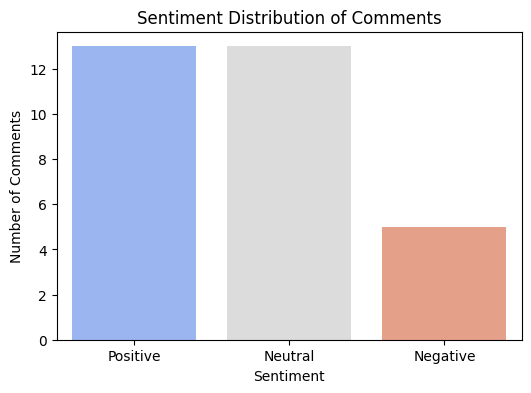

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize sentiment distribution
def plot_sentiment_distribution(analyzed_comments):
    sentiment_counts = {
        "Positive": sum(1 for c in analyzed_comments if c["sentiment_vader"] == "Positive"),
        "Neutral": sum(1 for c in analyzed_comments if c["sentiment_vader"] == "Neutral"),
        "Negative": sum(1 for c in analyzed_comments if c["sentiment_vader"] == "Negative"),
    }

    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette="coolwarm")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Comments")
    plt.title("Sentiment Distribution of Comments")
    plt.show()

# Example Usage
if y2:  
    first_post = y2[0]  
    analyzed_comments = analyze_comments(first_post["comments"])
    plot_sentiment_distribution(analyzed_comments)


In [11]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpathlib-0.21.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.2 MB 2.0 MB/s eta 0:00:07
   - -------------------------------------- 0.5/12.2 MB 5.2 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/12.2 MB 7.4 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/12.2 MB 10.5 MB/s eta 0:00:01
   ------- ------

In [13]:
import streamlit as st
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import spacy